# Лабораторная работа №2, Ишков Денис, ИУ5-24М, 2021г.

Краткое описание данных: предлагается поработать над предсказанием погоды в Австралии, будет ли завтра дождь или нет.

Основные признаки:

* Date - Дата наблюдений
* Location - Название локации, в которой расположена метеорологическая станция
* MinTemp - Минимальная температура в градусах цельсия
* MaxTemp - Максимальная температура в градусах цельсия
* Rainfall - Количество осадков, зафиксированных за день в мм
* Evaporation - Так называемое "pan evaporation" класса А (мм) за 24 часа до 9 утра
* Sunshine - Число солнечных часов за день
* WindGustDir - направление самого сильного порыва ветра за последние 24 часа
* WindGustSpeed - скорость (км / ч) самого сильного порыва ветра за последние 24 часа
* WindDir9am - направление ветра в 9 утра

In [ ]:
!pip install wldhx.yadisk-direct
!curl -L $(yadisk-direct https://disk.yandex.ru/i/2bePAZi16dhUAg) -o weatherAUS.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 13.5M  100 13.5M    0     0  3118k      0  0:00:04  0:00:04 --:--:-- 4897k


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('weatherAUS.csv')

In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

## Визуализация признаков

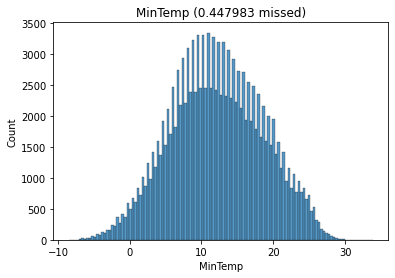

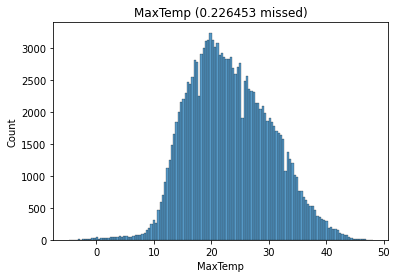

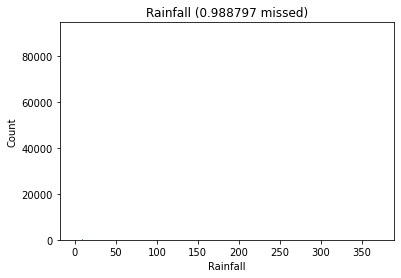

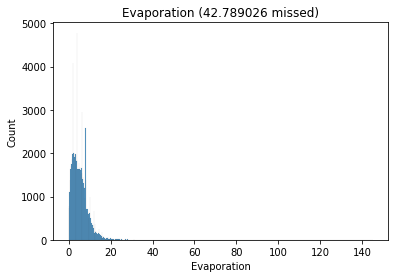

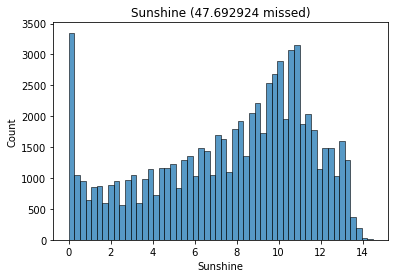

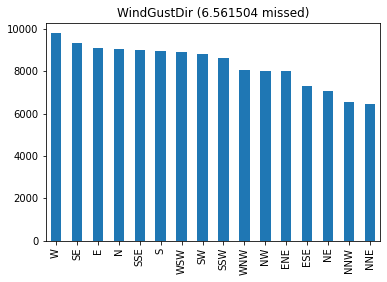

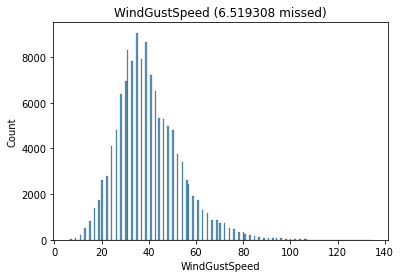

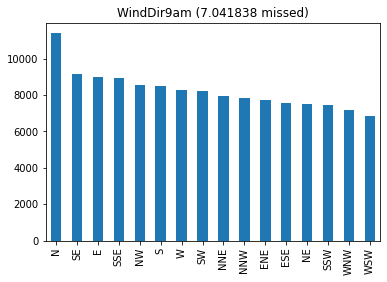

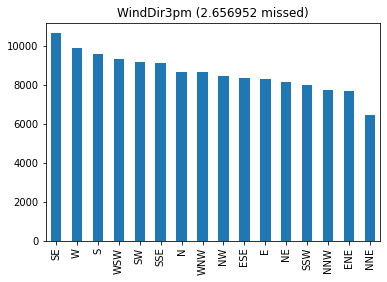

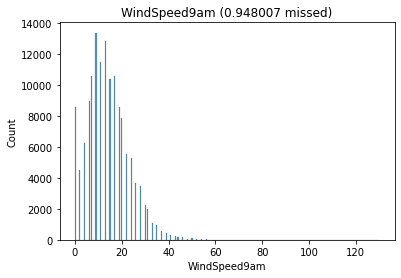

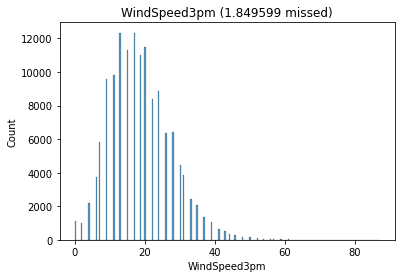

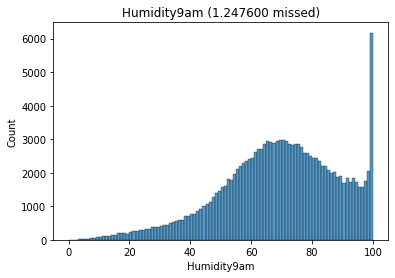

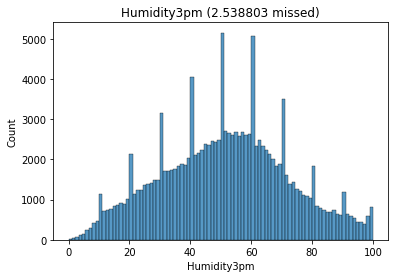

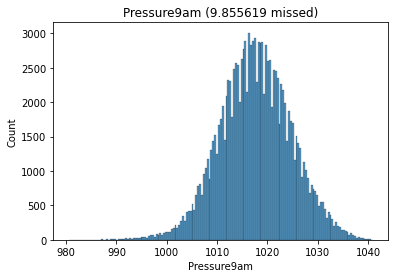

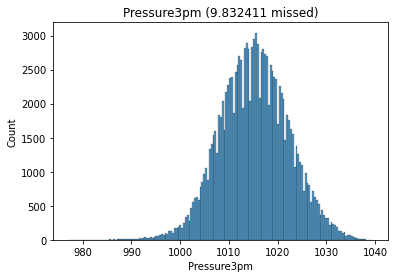

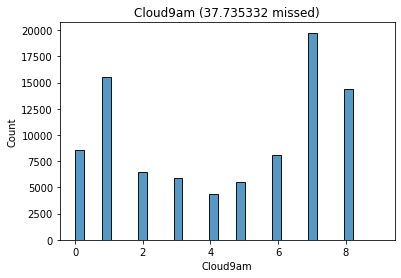

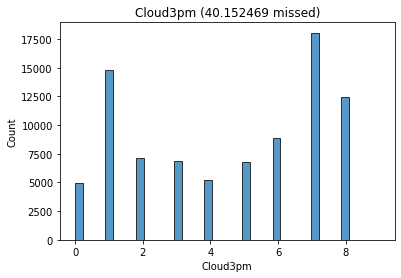

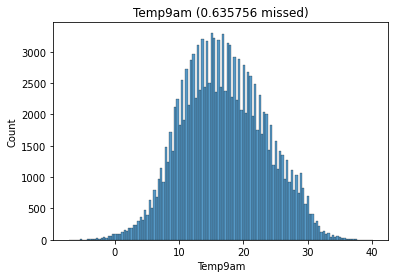

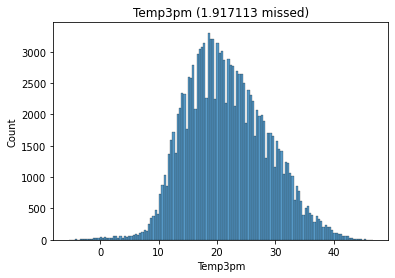

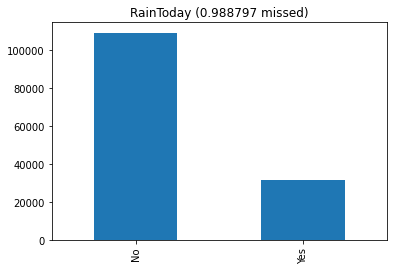

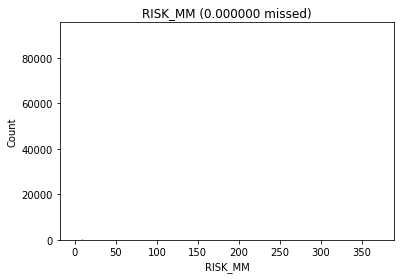

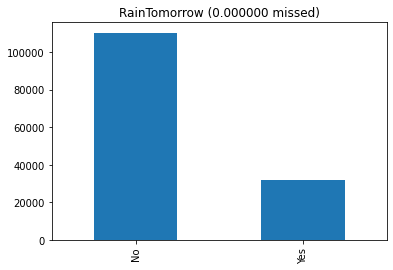

In [ ]:
for col in df.columns[2:]:
  if df[col].dtype != 'float64':
    if df[col].dtype == 'object':
      df[col].value_counts().plot(kind='bar')
    else:
      continue
  else:
    sns.histplot(df[col])
  plt.title(col+' (%f missed)'%(df[col].isna().mean()*100))
  plt.show()

In [ ]:
train_part = df.RainTomorrow.size*75//100
df_train = df.iloc[:train_part].copy()
df_test = df.iloc[train_part:].copy()
del df

## Изучение процентна пропущенных значений

In [ ]:
colmiss = dict()
for col in df_train.columns[2:]:
  result = [col.strip()]
  for h, d in [('train', df_train),
               ('test', df_test)]:
      result.append('\t\t{}: ({:.1f}% missed)\t'.format(h, d[col].isna().mean()*100))
  colmiss[col] = d[col].isna().mean()*100
  print(''.join(result))

MinTemp		train: (0.5% missed)			test: (0.4% missed)	
MaxTemp		train: (0.2% missed)			test: (0.3% missed)	
Rainfall		train: (1.1% missed)			test: (0.8% missed)	
Evaporation		train: (41.6% missed)			test: (46.5% missed)	
Sunshine		train: (48.7% missed)			test: (44.7% missed)	
WindGustDir		train: (6.1% missed)			test: (7.9% missed)	
WindGustSpeed		train: (6.1% missed)			test: (7.8% missed)	
WindDir9am		train: (7.7% missed)			test: (5.2% missed)	
WindDir3pm		train: (2.6% missed)			test: (2.9% missed)	
WindSpeed9am		train: (1.1% missed)			test: (0.4% missed)	
WindSpeed3pm		train: (1.7% missed)			test: (2.3% missed)	
Humidity9am		train: (1.2% missed)			test: (1.3% missed)	
Humidity3pm		train: (1.7% missed)			test: (5.2% missed)	
Pressure9am		train: (9.1% missed)			test: (12.0% missed)	
Pressure3pm		train: (9.1% missed)			test: (12.1% missed)	
Cloud9am		train: (36.5% missed)			test: (41.4% missed)	
Cloud3pm		train: (38.4% missed)			test: (45.3% missed)	
Temp9am		train: (0.8% missed)			test: (

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106644 entries, 0 to 106643
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           106644 non-null  object 
 1   Location       106644 non-null  object 
 2   MinTemp        106162 non-null  float64
 3   MaxTemp        106414 non-null  float64
 4   Rainfall       105517 non-null  float64
 5   Evaporation    62333 non-null   float64
 6   Sunshine       54707 non-null   float64
 7   WindGustDir    100137 non-null  object 
 8   WindGustSpeed  100160 non-null  float64
 9   WindDir9am     98485 non-null   object 
 10  WindDir3pm     103893 non-null  object 
 11  WindSpeed9am   105454 non-null  float64
 12  WindSpeed3pm   104838 non-null  float64
 13  Humidity9am    105316 non-null  float64
 14  Humidity3pm    104883 non-null  float64
 15  Pressure9am    96912 non-null   float64
 16  Pressure3pm    96956 non-null   float64
 17  Cloud9am       67720 non-null

In [ ]:
df_train_nonmissed = df_train[~df_train.isna().apply(lambda row: row.values.any(), axis=1)].copy()
df_train_nonmissed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43258 entries, 5939 to 105940
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           43258 non-null  object 
 1   Location       43258 non-null  object 
 2   MinTemp        43258 non-null  float64
 3   MaxTemp        43258 non-null  float64
 4   Rainfall       43258 non-null  float64
 5   Evaporation    43258 non-null  float64
 6   Sunshine       43258 non-null  float64
 7   WindGustDir    43258 non-null  object 
 8   WindGustSpeed  43258 non-null  float64
 9   WindDir9am     43258 non-null  object 
 10  WindDir3pm     43258 non-null  object 
 11  WindSpeed9am   43258 non-null  float64
 12  WindSpeed3pm   43258 non-null  float64
 13  Humidity9am    43258 non-null  float64
 14  Humidity3pm    43258 non-null  float64
 15  Pressure9am    43258 non-null  float64
 16  Pressure3pm    43258 non-null  float64
 17  Cloud9am       43258 non-null  float64
 18  Cl

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
cols = df_train_nonmissed.columns
cols

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

## Добавление координат о районах и направлении ветра

In [ ]:
coordinates_latitude = dict(Cobar=31.4958,
                            CoffsHarbour=30.2986,
                            Moree=29.4658,
                            NorfolkIsland=29.0408,
                            Sydney=33.8688,
                            SydneyAirport=33.9399,
                            WaggaWagga=35.1082,
                            Williamtown=32.8150,
                            Canberra=35.2809,
                            Sale=38.1026,
                            MelbourneAirport=37.6690,
                            Melbourne=37.8136,
                            Mildura=34.2080,
                            Portland=45.5051,
                            Watsonia=37.7080,
                            Brisbane=27.4705,
                            Cairns=16.9186,
                            Townsville=19.2590,
                            MountGambier=37.8284,
                            Nuriootpa=34.4666,
                            Woomera=31.1656)
coordinates_longitude = dict(Cobar=145.8389,
                            CoffsHarbour=153.1094,
                            Moree=149.8339,
                            NorfolkIsland=167.9547,
                            Sydney=151.2093,
                            SydneyAirport=151.1753,
                            WaggaWagga=147.3598,
                            Williamtown=151.8428,
                            Canberra=149.1300,
                            Sale=147.0730,
                            MelbourneAirport=144.8410,
                            Melbourne=144.9631,
                            Mildura=142.1246,
                            Portland=122.6750,
                            Watsonia=145.0830,
                            Brisbane=153.0260,
                            Cairns=145.7781,
                            Townsville=146.8169,
                            MountGambier=140.7804,
                            Nuriootpa=138.9917,
                            Woomera=136.8193)

In [ ]:
# wind direction
# http://snowfence.umn.edu/Components/winddirectionanddegrees.htm
# N 348.75 - 11.25
# NNE 11.25 - 33.75
# NE 33.75 - 56.25
# ENE 56.25 - 78.75
# E 78.75 - 101.25
# ESE 101.25 - 123.75
# SE 123.75 - 146.25
# SSE 146.25 - 168.75
# S 168.75 - 191.25
# SE 123.75 - 146.25
# SSE 146.25 - 168.75
# SSW 191.25 - 213.75
# SW 213.75 - 236.25
# WSW 236.25 - 258.75
# W 258.75 - 281.25
# WNW 281.25 - 303.75
# NW 303.75 - 326.25
# NNW 326.25 - 348.75


map_direction = dict(E=90, ENE=67.5, ESE=110, N=0, NE=45,
                     NNE=20, NNW=335, NW=315, S=180, SE=135,
                     SSE=155, SSW=200, SW=225, W=270,
                     WNW=290, WSW=245)

In [ ]:
cols_directions = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
for col in cols_directions:
    df_train_nonmissed[col+'Degrees'] = df_train_nonmissed[col].apply(lambda x: map_direction[x])
    df_train_nonmissed[col+'Sin'] = np.sin(df_train_nonmissed[col+'Degrees']*np.pi/180)
    df_train_nonmissed[col+'Cos'] = np.cos(df_train_nonmissed[col+'Degrees']*np.pi/180)
if cols_directions[0]+'Degrees' not in cols:
    cols = list(map(lambda x: x+'Degrees', cols_directions)) + list(filter(lambda x: x not in cols_directions, cols))
if cols_directions[0]+'Sin' not in cols:
    cols = list(map(lambda x: x+'Sin', cols_directions)) + list(filter(lambda x: x not in cols_directions, cols))
if cols_directions[0]+'Cos' not in cols:
    cols = list(map(lambda x: x+'Cos', cols_directions)) + list(filter(lambda x: x not in cols_directions, cols))

In [ ]:
missed_columns = [df_train[col.split('Degrees')[0].split('Cos')[0].split('Sin')[0]].isna().any() for col in cols]
missed_columns

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False]

## Некоторые другие созданные признаки + матрица корреляций

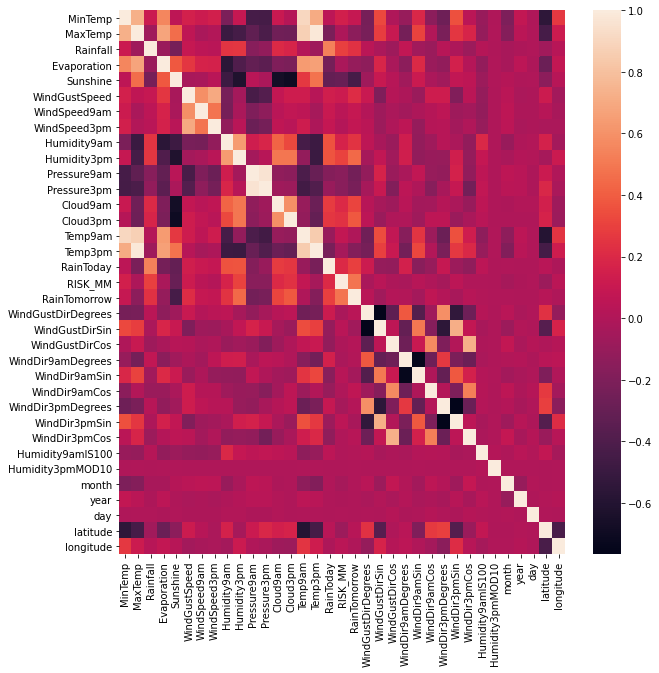

In [ ]:
data_x = df_train_nonmissed.copy()
# box-cox
for col in ['Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']:
    data_x[col] = np.log(1+data_x[col])
# humidity features
data_x['Humidity9amIS100'] = data_x['Humidity9am'] == 100
data_x['Humidity3pmMOD10'] = data_x['Humidity3pm'] % 10 == 0
# encode target
data_x['RainToday'] = pd.get_dummies(data_x.RainToday, drop_first=True)
data_x['RainTomorrow'] = pd.get_dummies(data_x.RainTomorrow, drop_first=True)
# season features
data_x['month'] = pd.to_datetime(data_x['Date']).dt.month
data_x['year'] = pd.to_datetime(data_x['Date']).dt.year
data_x['day'] = pd.to_datetime(data_x['Date']).dt.day
# coordinates features
data_x['latitude'] = data_x['Location'].apply(lambda x: coordinates_latitude[x])
data_x['longitude'] = data_x['Location'].apply(lambda x: coordinates_longitude[x])
data_x.drop(columns=['Date', 'Location'], inplace=True)
plt.figure(figsize=(10, 10))
sns.heatmap(data_x.corr(), )

## Переобозначение месяцев и дней для повышения корреляции с целевым признаком

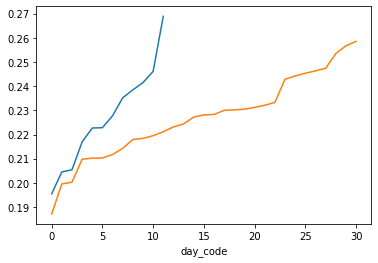

In [ ]:
month_indexes = data_x.groupby('month').RainTomorrow.agg('mean').sort_values().reset_index().month.values
data_x['month_code'] = data_x.month.apply(lambda x: np.argmax(x==month_indexes))
data_x.groupby('month_code').RainTomorrow.agg('mean').plot()
day_indexes = data_x.groupby('day').RainTomorrow.agg('mean').sort_values().reset_index().day.values
data_x['day_code'] = data_x.day.apply(lambda x: np.argmax(x==day_indexes))
data_x.groupby('day_code').RainTomorrow.agg('mean').plot()

## Масштабирование признаков в неотрицательный диапазон



In [ ]:
train_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'WindGustDirDegrees',
       'WindGustDirSin', 'WindGustDirCos', 'WindDir9amDegrees',
       'WindDir9amSin', 'WindDir9amCos', 'WindDir3pmDegrees', 'WindDir3pmSin',
       'WindDir3pmCos', 'Humidity9amIS100', 'Humidity3pmMOD10',
       'year', 'latitude', 'longitude', 'month_code', 'day_code']
target_cols = ['RainTomorrow',]
scaler = MinMaxScaler().fit(data_x[train_cols])
data_x_p = scaler.transform(data_x[train_cols])
data_y = data_x[target_cols]

## Поиск лучших параметров для факторизации

In [ ]:
for col in train_cols:
   for col2 in filter(lambda x: x!=col, train_cols):
      if col2.startswith(col):
         print(col, col2, colmiss[col])

Humidity9am Humidity9amIS100 1.2546063180398885
Humidity3pm Humidity3pmMOD10 5.201271484429942


In [ ]:
missprobs = []
for col in train_cols:
    if col in ['WindGustDirDegrees',
               'WindGustDirSin',
               'WindGustDirCos',
               'WindDir9amDegrees',
               'WindDir9amSin',
               'WindDir9amCos',
               'WindDir3pmDegrees',
               'WindDir3pmSin',
               'WindDir3pmCos',
               'Humidity9amIS100',
               'Humidity3pmMOD10',
               'year',
               'latitude',
               'longitude',
               'month_code',
               'day_code']:
      missprobs.append(0.0)
    else:
      missprobs.append(colmiss[col])
missprobs

[0.436017890798616,
 0.2587977158288559,
 0.7848322034375087,
 46.504824326985286,
 44.66792314833047,
 7.837069959773833,
 0.444456946749557,
 2.3179273678584487,
 1.2546063180398885,
 5.201271484429942,
 12.045345860643057,
 12.076289065796507,
 41.44420377507103,
 45.27553517679822,
 0.2925539396326198,
 4.070437987003854,
 0.7848322034375087,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [ ]:
((.sum(axis=-1) > 0).mean()

0.9431550233482824

In [ ]:
def get_missed_data(d, missprobs):
   '''Get clean data as input and zeroes values in every column
   by given probability matrix'''
   d = d.copy()
   mask = np.random.uniform(0, 100, size=d.shape)
   d[(mask - np.array(missprobs)) < 0] = 0.0
   return d

In [ ]:
from sklearn.decomposition import NMF
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error
from tqdm.notebook import tqdm

pbar = tqdm()
kfold = KFold(shuffle=True, n_splits=3, random_state=69)
history = {}
for alpha in [0.0, 0.1, 0.25, 0.5]:
    for l1_ratio in [0.0, 0.5, 1.0]:
        for n_components in range(3, 25, 4):
            metrics = []
            for train_ind, test_ind in kfold.split(data_x_p):
                nmf = NMF(alpha=alpha,
                          n_components=n_components,
                          l1_ratio=l1_ratio,
                          random_state=69,
                          verbose=0).fit(data_x_p[train_ind])
                for _ in range(5):
                    metrics.append(r2_score(data_x_p[test_ind],
                                            nmf.inverse_transform(nmf.transform(
                                                get_missed_data(data_x_p[test_ind],
                                                                missprobs)))))
            history[(alpha, l1_ratio, n_components)] = np.mean(metrics)
            pbar.update(1)

    alpha  l1_ratio  n_components     score
47   0.25       0.5            23  0.664608
65   0.50       0.5            23  0.659560
53   0.25       1.0            23  0.650397
59   0.50       0.0            23  0.649362
35   0.10       1.0            23  0.649315
29   0.10       0.5            23  0.646778
41   0.25       0.0            23  0.634021
23   0.10       0.0            23  0.626976
40   0.25       0.0            19  0.622795
58   0.50       0.0            19  0.622672


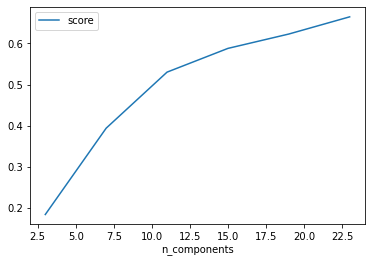

In [ ]:
history_dat = [(alpha, l1_ratio, n_components, score) for (alpha, l1_ratio, n_components), score in history.items()]
history_df = pd.DataFrame(history_dat)
history_df.columns = ['alpha', 'l1_ratio', 'n_components', 'score']
print(history_df.sort_values(by=['score'], ascending=False).head(10))
history_df.groupby(['alpha', 'l1_ratio']).score.agg('max')
history_df.groupby(['n_components']).score.agg('max').reset_index().plot(x='n_components', y='score')

In [ ]:
nmf = NMF(alpha=0.25, n_components=19,
          l1_ratio=0.0,
          random_state=69,
          verbose=0).fit(data_x_p)

## Заполнение пропусков в первоначальных данных

### Заполнение пропусков средним значением и модой для категориальных признаков

In [ ]:
data_test = df_test.copy()
data_train = df_train.copy()
datas = [data_train, data_test]
for i, d in enumerate(datas):
    #missing value imputation
    for col in d.columns[2:]:
      if d[col].isna().mean() == 0:
          continue
      if d[col].dtype != 'float64':
        if d[col].dtype == 'object':
            # fill with moda
            print(col, d[col].value_counts().reset_index().values[0, 0])
            datas[i].loc[d[col].isna(), col] = d.loc[~d[col].isna(), col].value_counts().reset_index().values[0, 0]
        else:
            print(col)
      else:
        # fill with mean
        print(col, d[col].mean())
        datas[i].loc[d[col].isna(), col] = d.loc[~d[col].isna(), col].mean()
      print('After imputation', col, d[col].isna().mean())

    # directions encoding
    for col in cols_directions:
        datas[i][col+'Degrees'] = d[col].apply(lambda x: map_direction[x])
        datas[i][col+'Sin'] = np.sin(d[col+'Degrees']*np.pi/180)
        datas[i][col+'Cos'] = np.cos(d[col+'Degrees']*np.pi/180)
    # box-cox
    for col in ['Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']:
        datas[i][col] = np.log(1+d[col])
    # humidity features
    datas[i]['Humidity9amIS100'] = d['Humidity9am'] == 100
    datas[i]['Humidity3pmMOD10'] = d['Humidity3pm'] % 10 == 0
    # encode target
    datas[i]['RainToday'] = pd.get_dummies(d.RainToday, drop_first=True)
    datas[i]['RainTomorrow'] = pd.get_dummies(d.RainTomorrow, drop_first=True)
    # season features
    datas[i]['month'] = pd.to_datetime(d['Date']).dt.month
    datas[i]['year'] = pd.to_datetime(d['Date']).dt.year
    datas[i]['day'] = pd.to_datetime(d['Date']).dt.day
    datas[i]['month_code'] = d.month.apply(lambda x: np.argmax(x==month_indexes))
    datas[i]['day_code'] = d.day.apply(lambda x: np.argmax(x==day_indexes))
    # coordinates features
    datas[i]['latitude'] = d['Location'].apply(lambda x: coordinates_latitude.get(x, 25.2744))# default australian coordinates
    datas[i]['longitude'] = d['Location'].apply(lambda x: coordinates_longitude.get(x, 133.7751))# default australian coordinates
    datas[i].drop(columns=['Date', 'Location'], inplace=True)

MinTemp 11.96442512386722
After imputation MinTemp 0.0
MaxTemp 22.7381096472271
After imputation MaxTemp 0.0
Rainfall 2.4116483599802083
After imputation Rainfall 0.0
Evaporation 5.33922801726212
After imputation Evaporation 0.0
Sunshine 7.382788308625942
After imputation Sunshine 0.0
WindGustDir W
After imputation WindGustDir 0.0
WindGustSpeed 39.797633785942494
After imputation WindGustSpeed 0.0
WindDir9am N
After imputation WindDir9am 0.0
WindDir3pm W
After imputation WindDir3pm 0.0
WindSpeed9am 13.92605306579172
After imputation WindSpeed9am 0.0
WindSpeed3pm 18.768929205059234
After imputation WindSpeed3pm 0.0
Humidity9am 70.42160735310874
After imputation Humidity9am 0.0
Humidity3pm 52.69115109216937
After imputation Humidity3pm 0.0
Pressure9am 1018.0428244180362
After imputation Pressure9am 0.0
Pressure3pm 1015.6959712859581
After imputation Pressure3pm 0.0
Cloud9am 4.597829297105729
After imputation Cloud9am 0.0
Cloud3pm 4.65576967019575
After imputation Cloud3pm 0.0
Temp9am 16.

### Заполнение пропусков константой

In [ ]:
data_test = df_test.copy()
data_train = df_train.copy()
datas2 = [data_train, data_test]
for i, d in enumerate(datas2):
    #missing value imputation
    for col in d.columns[2:]:
      if d[col].isna().mean() == 0:
          continue
      if d[col].dtype != 'float64':
        if d[col].dtype == 'object':
            # fill with moda
            print(col, d[col].value_counts().reset_index().values[0, 0])
            datas2[i].loc[d[col].isna(), col] = 1e7
        else:
            print(col)
      else:
        # fill with mean
        print(col, d[col].mean())
        datas2[i].loc[d[col].isna(), col] = 1e7
      print('After imputation', col, d[col].isna().mean())

    # directions encoding
    for col in cols_directions:
        datas2[i][col+'Degrees'] = d[col].apply(lambda x: map_direction.get(x, 1000))
        datas2[i][col+'Sin'] = np.sin(d[col+'Degrees']*np.pi/180)
        datas2[i][col+'Cos'] = np.cos(d[col+'Degrees']*np.pi/180)
    # box-cox
    for col in ['Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']:
        datas2[i][col] = np.log(1+d[col])
    # humidity features
    datas2[i]['Humidity9amIS100'] = d['Humidity9am'] == 100
    datas2[i]['Humidity3pmMOD10'] = d['Humidity3pm'] % 10 == 0
    # encode target
    datas2[i]['RainToday'] = pd.get_dummies(d.RainToday, drop_first=True)
    datas2[i]['RainTomorrow'] = pd.get_dummies(d.RainTomorrow, drop_first=True)
    # season features
    datas2[i]['month'] = pd.to_datetime(d['Date']).dt.month
    datas2[i]['year'] = pd.to_datetime(d['Date']).dt.year
    datas2[i]['day'] = pd.to_datetime(d['Date']).dt.day
    datas2[i]['month_code'] = d.month.apply(lambda x: np.argmax(x==month_indexes))
    datas2[i]['day_code'] = d.day.apply(lambda x: np.argmax(x==day_indexes))
    # coordinates features
    datas2[i]['latitude'] = d['Location'].apply(lambda x: coordinates_latitude.get(x, 25.2744))# default australian coordinates
    datas2[i]['longitude'] = d['Location'].apply(lambda x: coordinates_longitude.get(x, 133.7751))# default australian coordinates
    datas2[i].drop(columns=['Date', 'Location'], inplace=True)

MinTemp 11.96442512386722
After imputation MinTemp 0.0
MaxTemp 22.7381096472271
After imputation MaxTemp 0.0
Rainfall 2.4116483599802083
After imputation Rainfall 0.0
Evaporation 5.33922801726212
After imputation Evaporation 0.0
Sunshine 7.382788308625942
After imputation Sunshine 0.0
WindGustDir W
After imputation WindGustDir 0.0
WindGustSpeed 39.797633785942494
After imputation WindGustSpeed 0.0
WindDir9am N
After imputation WindDir9am 0.0
WindDir3pm W
After imputation WindDir3pm 0.0
WindSpeed9am 13.92605306579172
After imputation WindSpeed9am 0.0
WindSpeed3pm 18.768929205059234
After imputation WindSpeed3pm 0.0
Humidity9am 70.42160735310874
After imputation Humidity9am 0.0
Humidity3pm 52.69115109216937
After imputation Humidity3pm 0.0
Pressure9am 1018.0428244180362
After imputation Pressure9am 0.0
Pressure3pm 1015.6959712859581
After imputation Pressure3pm 0.0
Cloud9am 4.597829297105729
After imputation Cloud9am 0.0
Cloud3pm 4.65576967019575
After imputation Cloud3pm 0.0
Temp9am 16.

### Заполнение пропусков обратной трансформаицией от NMF

In [ ]:
data_test = df_test.copy()
data_train = df_train.copy()
datas3 = [data_train, data_test]
for i, d in enumerate(datas3):
    #missing value imputation
    for col in d.columns[2:]:
      datas3[i][col+'isna'] = d[col].isna()
      if d[col].isna().mean() == 0:
          continue
      if d[col].dtype != 'float64':
        if d[col].dtype == 'object':
            # fill with moda
            print(col, d[col].value_counts().reset_index().values[0, 0])
            datas3[i].loc[d[col].isna(), col] = datas3[i].loc[~d[col].isna(), col].unique()[0]
        else:
            print(col)
      else:
          # fill with mean
          print(col, d[col].mean())
          datas3[i].loc[d[col].isna(), col] = datas3[i].loc[~d[col].isna(), col].mean()

      print('After imputation', col, d[col].isna().mean())

    # directions encoding
    for col in cols_directions:
        datas3[i][col+'Degrees'] = d[col].apply(lambda x: map_direction.get(x, 0))
        datas3[i][col+'Sin'] = np.sin(d[col+'Degrees']*np.pi/180)
        datas3[i][col+'Cos'] = np.cos(d[col+'Degrees']*np.pi/180)
        datas3[i][col+'Degrees'+'isna'] = d[col+'isna']
        datas3[i][col+'Sin'+'isna'] = d[col+'isna']
        datas3[i][col+'Cos'+'isna'] = d[col+'isna']
    # box-cox
    for col in ['Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']:
        datas3[i][col] = np.log(1+d[col])
    # humidity features
    datas3[i]['Humidity9amIS100'] = d['Humidity9am'] == 100
    datas3[i]['Humidity9amIS100'+'isna'] = d['Humidity9amisna']
    datas3[i]['Humidity3pmMOD10'] = d['Humidity3pm'] % 10 == 0
    datas3[i]['Humidity3pmMOD10isna'] = d['Humidity3pmisna']
    # encode target
    datas3[i]['RainToday'] = pd.get_dummies(d.RainToday, drop_first=True)
    datas3[i]['RainTomorrow'] = pd.get_dummies(d.RainTomorrow, drop_first=True)
    # season features
    datas3[i]['month'] = pd.to_datetime(d['Date']).dt.month
    datas3[i]['year'] = pd.to_datetime(d['Date']).dt.year
    datas3[i]['day'] = pd.to_datetime(d['Date']).dt.day
    datas3[i]['month_code'] = d.month.apply(lambda x: np.argmax(x==month_indexes))
    datas3[i]['day_code'] = d.day.apply(lambda x: np.argmax(x==day_indexes))

    # coordinates features
    datas3[i]['latitude'] = d['Location'].apply(lambda x: coordinates_latitude.get(x, 0))
    datas3[i]['longitude'] = d['Location'].apply(lambda x: coordinates_longitude.get(x, 0))
    datas3[i]['latitude'+'isna'] = False
    datas3[i]['longitude'+'isna'] = False
    datas3[i]['day_code'+'isna'] = False
    datas3[i]['month_code'+'isna'] = False
    datas3[i]['year'+'isna'] = False
    datas3[i].drop(columns=['Date', 'Location'], inplace=True)

MinTemp 11.96442512386722
After imputation MinTemp 0.0
MaxTemp 22.7381096472271
After imputation MaxTemp 0.0
Rainfall 2.4116483599802083
After imputation Rainfall 0.0
Evaporation 5.33922801726212
After imputation Evaporation 0.0
Sunshine 7.382788308625942
After imputation Sunshine 0.0
WindGustDir W
After imputation WindGustDir 0.0
WindGustSpeed 39.797633785942494
After imputation WindGustSpeed 0.0
WindDir9am N
After imputation WindDir9am 0.0
WindDir3pm W
After imputation WindDir3pm 0.0
WindSpeed9am 13.92605306579172
After imputation WindSpeed9am 0.0
WindSpeed3pm 18.768929205059234
After imputation WindSpeed3pm 0.0
Humidity9am 70.42160735310874
After imputation Humidity9am 0.0
Humidity3pm 52.69115109216937
After imputation Humidity3pm 0.0
Pressure9am 1018.0428244180362
After imputation Pressure9am 0.0
Pressure3pm 1015.6959712859581
After imputation Pressure3pm 0.0
Cloud9am 4.597829297105729
After imputation Cloud9am 0.0
Cloud3pm 4.65576967019575
After imputation Cloud3pm 0.0
Temp9am 16.

In [ ]:
for i, d in enumerate(datas3):
    mask = datas3[i][list(map(lambda x: x+'isna', train_cols))].values
    values = datas3[i][train_cols].values
    values_p = scaler.transform(values)
    values_p[mask] = 0.0
    values_p = np.clip(values_p, 0.0, 1.0)
    values_p = nmf.inverse_transform(nmf.transform(values_p))
    values_r = scaler.inverse_transform(values_p)
    values[mask] = values_r[mask]
    for j, col in enumerate(train_cols):
        datas3[i][col] = values[:, j]

### Проверка импутаций на качество моделей

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import classification_report

ddd = [[data_x[train_cols], data_y],
[datas[0][train_cols], datas[0][target_cols]],
[datas2[0][train_cols], datas2[0][target_cols]],
[datas3[0][train_cols], datas3[0][target_cols]],]

ddd_test = [[datas[1][train_cols], datas[1][target_cols]],
[datas[1][train_cols], datas[1][target_cols]],
[datas2[1][train_cols], datas2[1][target_cols]],
[datas3[1][train_cols], datas3[1][target_cols]],]

metainfo = ['dropped', 'meanandmoda', 'constant', 'nmf']

for ((x, y), (xt, yt), info) in zip(ddd, ddd_test, metainfo):
    dt = RandomForestClassifier(max_depth=1, random_state=69)

    params = {'max_depth': [5, 7, 8, 10],
              'n_estimators': [50, 100, 150]}
    kfold = KFold(n_splits=4, shuffle=True, random_state=69)
    dt = GridSearchCV(dt, params,
                      scoring='roc_auc', cv=kfold,
                      verbose=False).fit(x, y.values[:, 0])
    print(info)
    print(classification_report(yt, dt.predict(xt)))
    print('-'*50)

dropped
              precision    recall  f1-score   support

           0       0.84      0.98      0.90     27882
           1       0.81      0.31      0.45      7667

    accuracy                           0.84     35549
   macro avg       0.83      0.65      0.68     35549
weighted avg       0.83      0.84      0.81     35549

--------------------------------------------------
meanandmoda
              precision    recall  f1-score   support

           0       0.85      0.98      0.91     27882
           1       0.81      0.36      0.50      7667

    accuracy                           0.84     35549
   macro avg       0.83      0.67      0.70     35549
weighted avg       0.84      0.84      0.82     35549

--------------------------------------------------
constant
              precision    recall  f1-score   support

           0       0.86      0.97      0.91     27882
           1       0.78      0.41      0.54      7667

    accuracy                           0.85     355